In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
from collections import namedtuple
import utils

In [2]:
State = namedtuple("State", ["leader", "distribution", "population"])

def initialize_distribution(chromosome):
	return np.full(chromosome, 0.5)

def sample(distribution):
	v = np.random.random(distribution.shape)
	return np.where(v <= distribution, 1, 0)

def populate(distribution, size):
	return [sample(distribution) for _ in range(size)]

def deceptive_onemax(x, k = None):
	n = len(x)
	s = sum(x)
	return n if s == (k or n) else max(s - 1, 0)

def best(population, deception = None):
	return max(population, key = lambda x: deceptive_onemax(x, deception))

def PBIL(size = 0, chromosome = 0, lr = 0.1, mr = 0.1, shift = 0.1, deception = None):
	distribution = initialize_distribution(chromosome)
	population = populate(distribution, size)
	while True:
		leader = best(population, deception)
		yield State(leader, distribution, population)
		distribution = (1 - lr)*distribution + lr*leader
		mutations = sample(np.full(chromosome, mr))
		random_bits = sample(np.full(chromosome, 0.5))
		distribution = np.where(
			mutations == 1,
			(1 - shift)*distribution + shift*random_bits,
			distribution
		)
		population = populate(distribution, size)

In [3]:
def compare(param_name, param_values, generations = 100, deception = None, **defaults):
	cases = []
	for value in param_values:
		defaults[param_name] = value
		cases.append(PBIL(**defaults, deception=deception))
	
	leaders = []
	for states in utils.loop(generations, zip(*cases)):
		leaders.append(tuple((sum(state.leader)) for state in states))

	del defaults[param_name]
	xp, xs = max(zip(param_values, states), key=lambda x: deceptive_onemax(x[1].leader, deception))
	
	plot_title = f"Comparing '{param_name}' over {generations} generations\n {defaults}"
	stem_title = f"Distribution for {param_name} = {xp} with score of {deceptive_onemax(xs.leader, deception)}"
	
	utils.stemplot(xs.distribution, mirror=0.5, marker=False, ylabel="probability", title=stem_title)
	utils.quickplot(*list(zip(*leaders)), title = plot_title, legend = param_values, ylabel = "leader")
	utils.histogram(
		*[np.array(state.population).sum(axis=1) for state in states],
		title = "population",
		legend = param_values,
		ylabel = "individuals",
		overlap = True
	)

## Parameter testing (non-deceptive)

In [4]:
DEFAULTS = {
	"size": 512,
	"generations": 100,
	"chromosome": 200,
	"lr": 0.1,
	"mr": 0.25,
	"shift": 0.25
}

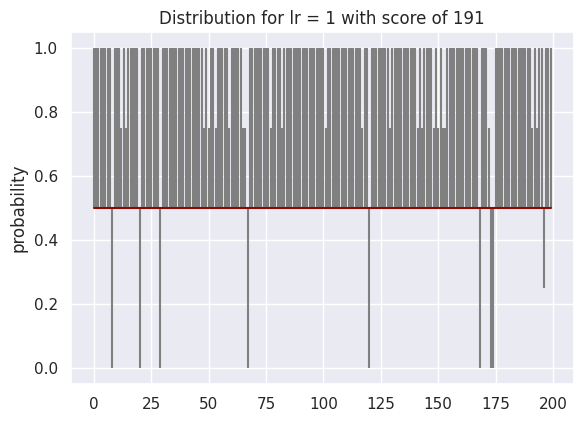

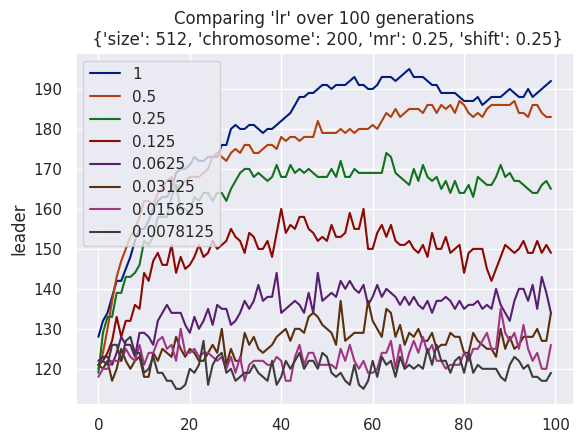

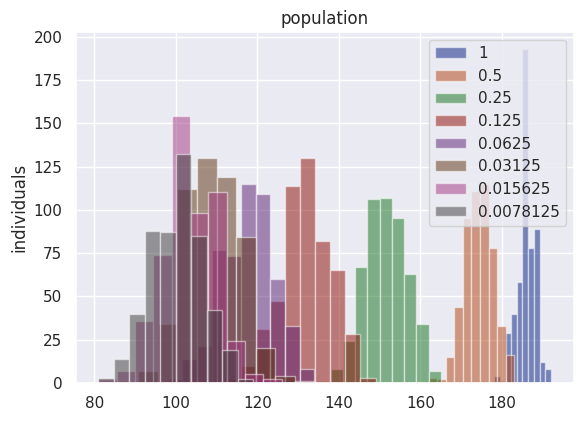

<Figure size 640x480 with 0 Axes>

In [5]:
compare("lr", [2**-i for i in range(0, 8)], **DEFAULTS)

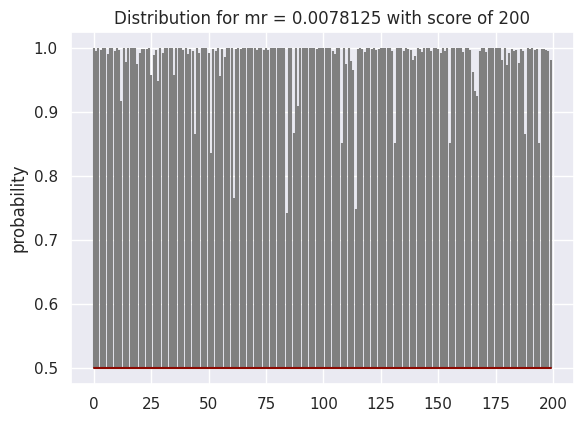

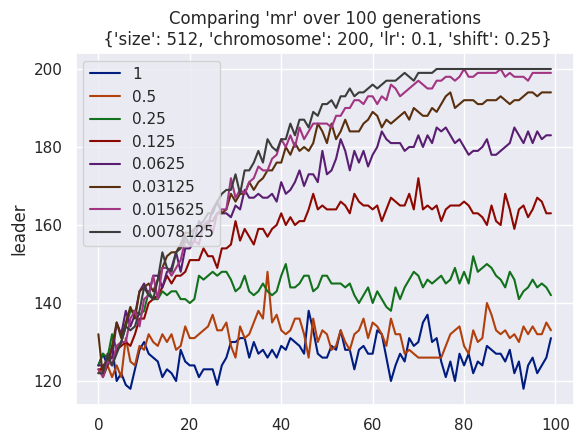

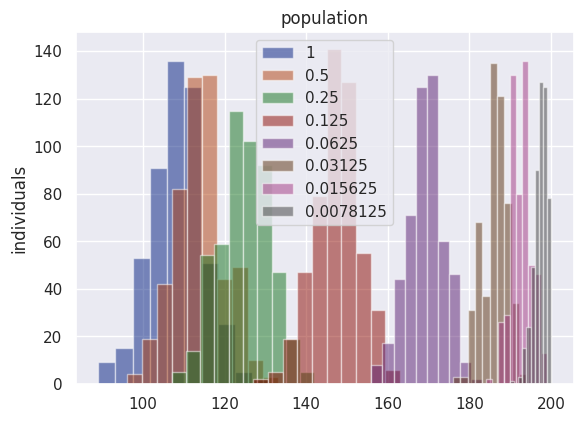

<Figure size 640x480 with 0 Axes>

In [6]:
compare("mr", [2**-i for i in range(0, 8)], **DEFAULTS)

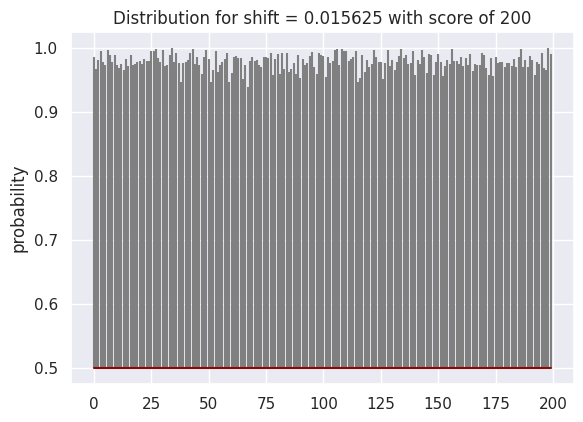

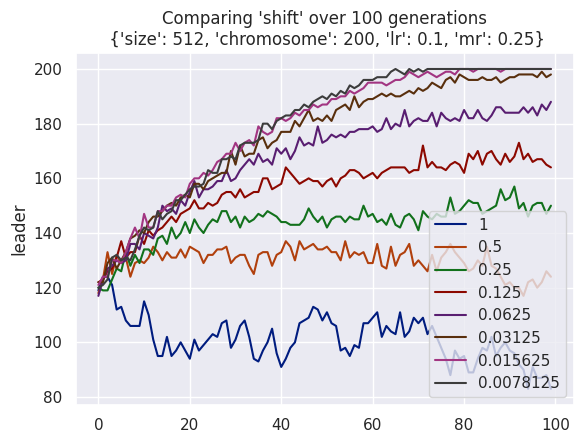

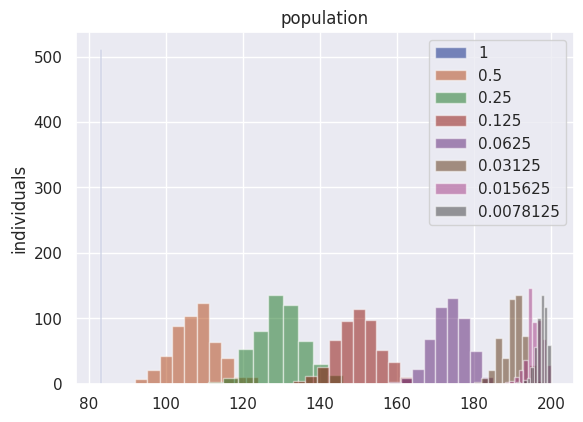

<Figure size 640x480 with 0 Axes>

In [7]:
compare("shift", [2**-i for i in range(0, 8)], **DEFAULTS)

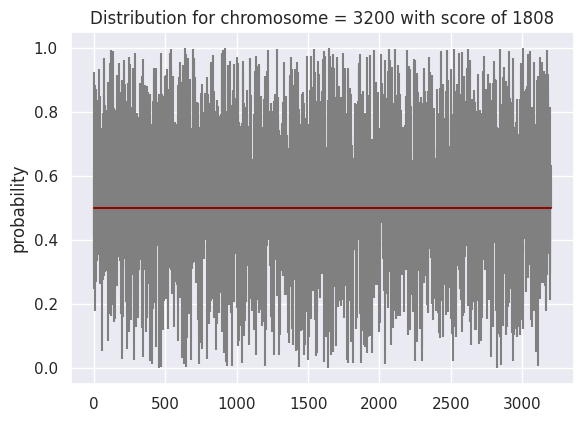

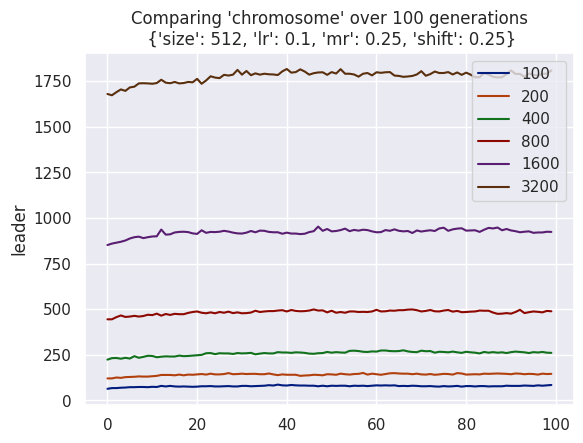

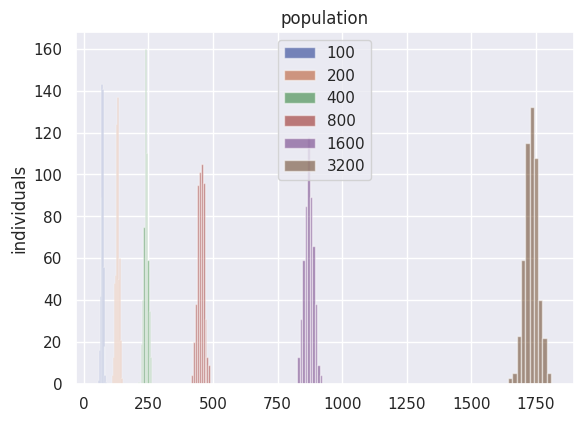

<Figure size 640x480 with 0 Axes>

In [23]:
compare("chromosome", [100, 200, 400, 800, 1600, 3200], **DEFAULTS)

## Deceptive problems

Deception around half of the chromosome's length is easy since we can often solve it by chance

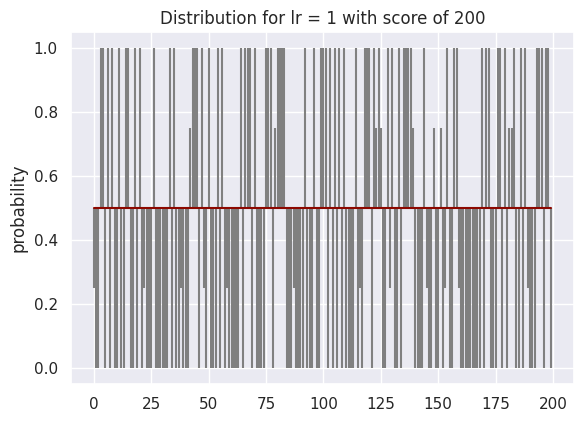

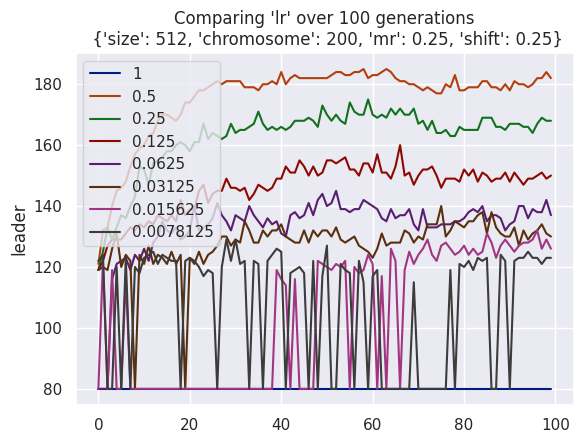

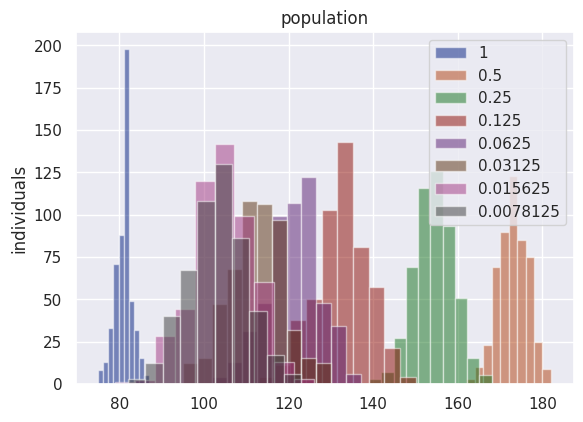

<Figure size 640x480 with 0 Axes>

In [8]:
compare("lr", [2**-i for i in range(0, 8)], **DEFAULTS, deception=80)

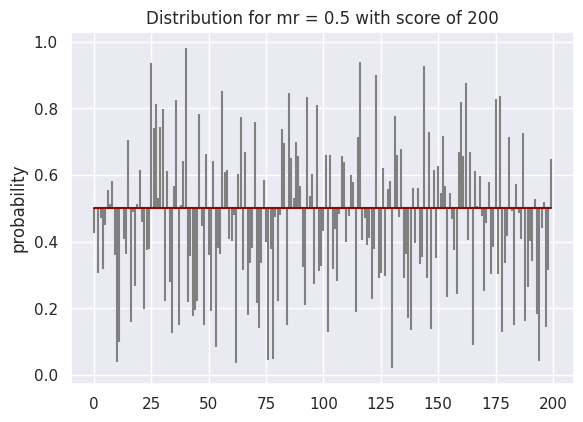

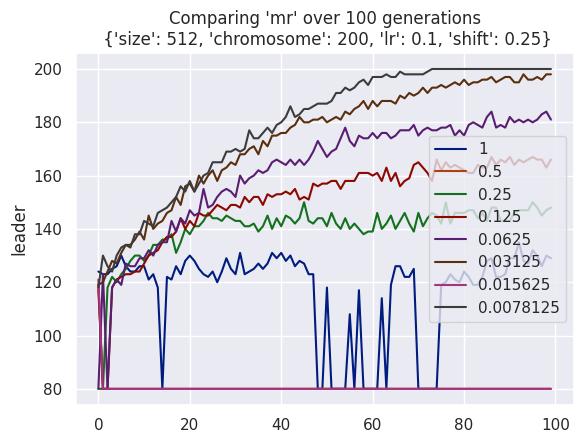

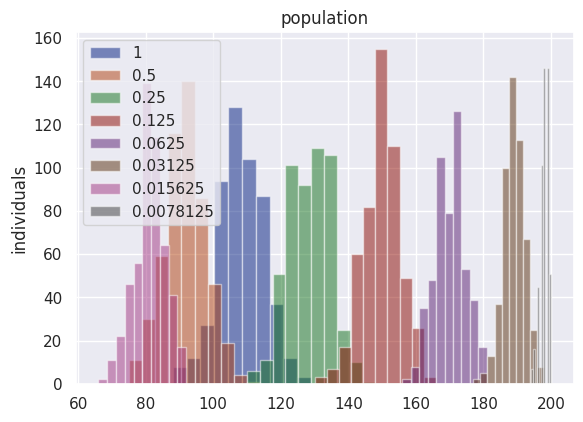

<Figure size 640x480 with 0 Axes>

In [9]:
compare("mr", [2**-i for i in range(0, 8)], **DEFAULTS, deception=80)

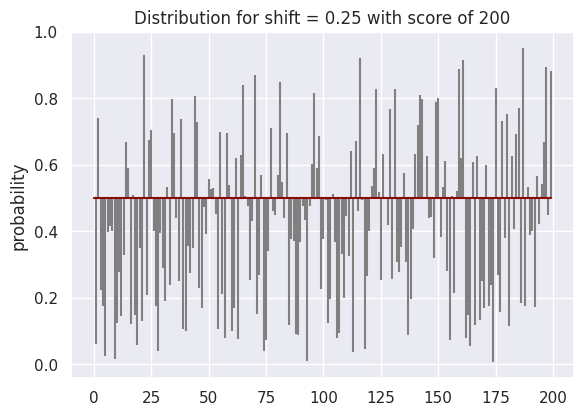

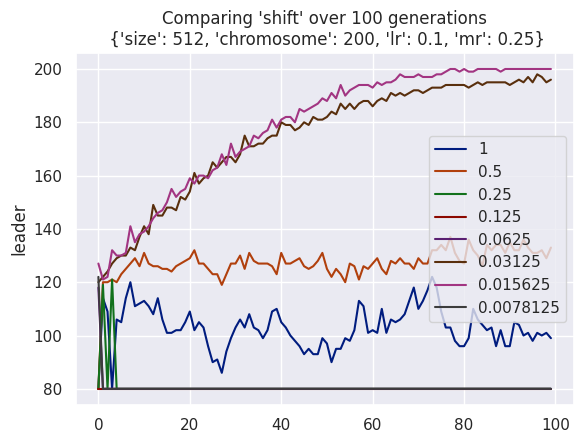

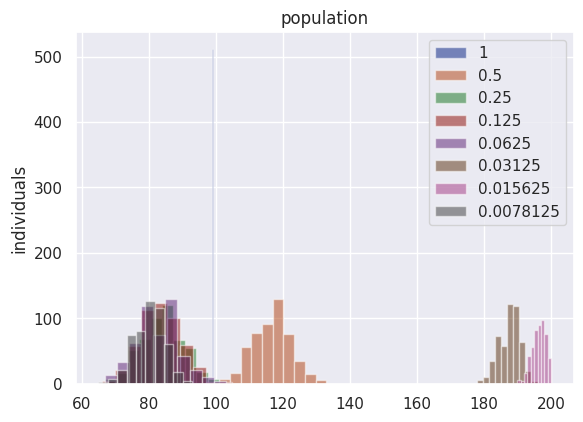

<Figure size 640x480 with 0 Axes>

In [10]:
compare("shift", [2**-i for i in range(0, 8)], **DEFAULTS, deception=80)

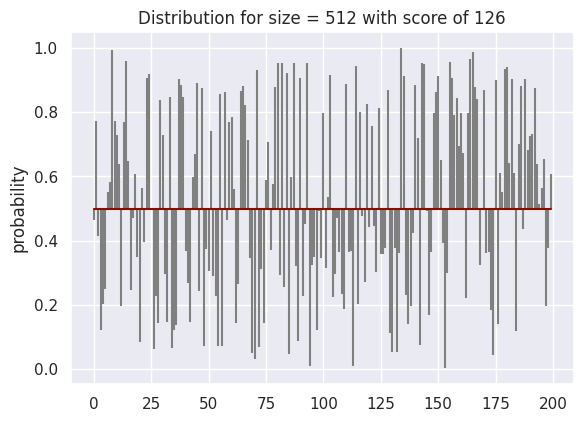

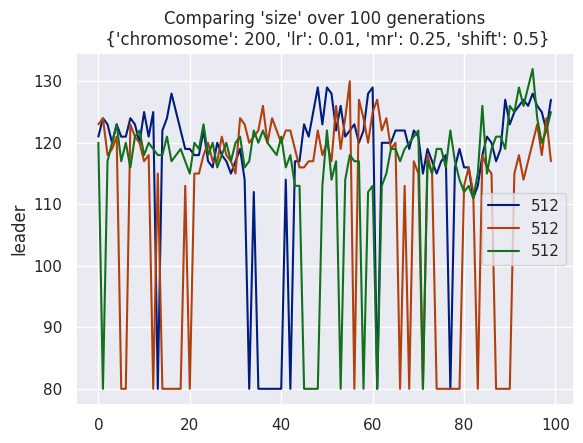

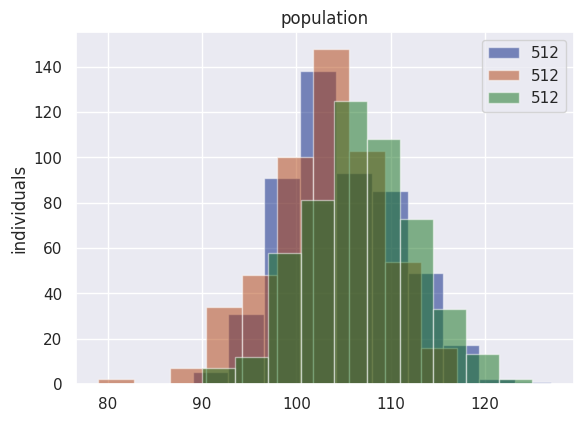

<Figure size 640x480 with 0 Axes>

In [19]:
PARAMS = {
	"size": 512,
	"generations": 100,
	"chromosome": 200,
	"lr": 0.01,
	"mr": 0.25,
	"shift": 0.5
}
compare("size", [512]*3, **PARAMS, deception=80)

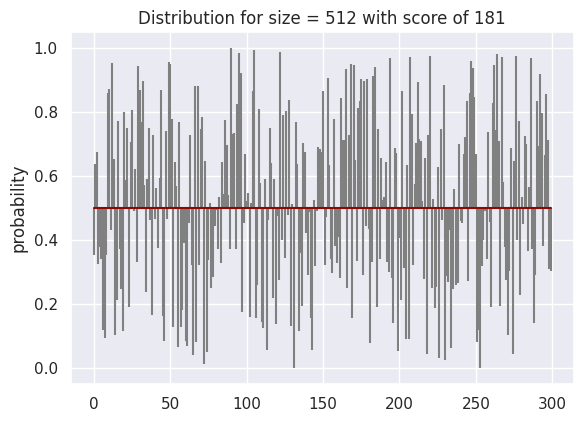

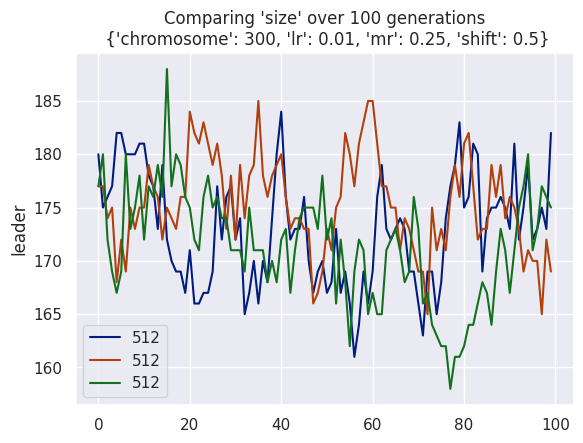

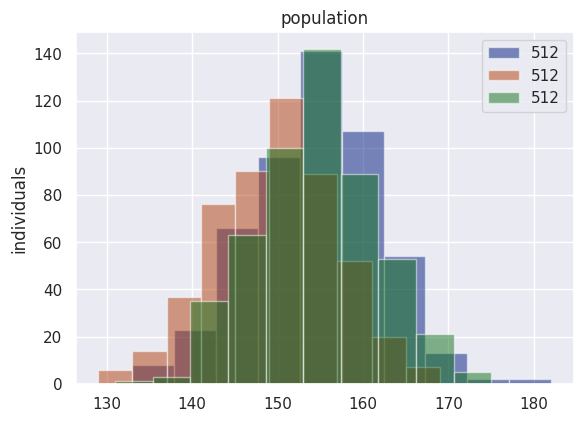

<Figure size 640x480 with 0 Axes>

In [22]:
PARAMS = {
	"size": 512,
	"generations": 100,
	"chromosome": 300, # up from 200
	"lr": 0.01,
	"mr": 0.25,
	"shift": 0.5
}
compare("size", [512]*3, **PARAMS, deception=80)